In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

%config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!——> 이 셀부터 설치빼고 다시 실행

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

#fm._rebuild()

NanumBarunGothic


Text(0.5, 1.0, '안녕!')

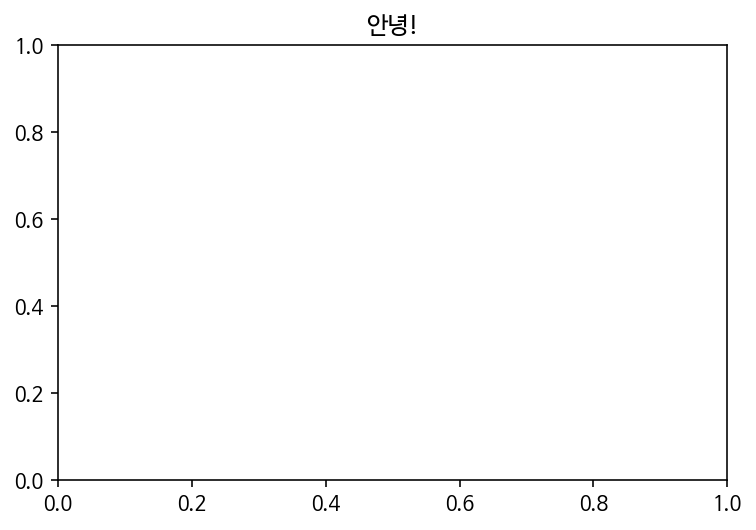

In [2]:
plt.title('안녕!')

In [3]:
bitcoin_df = pd.read_csv('/content/block3.csv', 
                         names=['day', 'price'],
                         encoding='utf-8')
bitcoin_df.head()

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44


In [4]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# 시계열 데이터는 시간적인 순서가 중요!
# 미래에 대한 수치를 예측하는 것!
# 최근 5일치를 검증용 데이터로 사용하게 됨
# 5일치를 제외한 나머지 데이터를 훈련데이터로 사용함

In [6]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df[:361]

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [7]:
pd.to_datetime(bitcoin_train_df['day'])

0     2020-12-09
1     2020-12-10
2     2020-12-11
3     2020-12-12
4     2020-12-13
         ...    
356   2021-11-30
357   2021-12-01
358   2021-12-02
359   2021-12-03
360   2021-12-04
Name: day, Length: 361, dtype: datetime64[ns]

In [8]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [9]:
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df.head(2)

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15


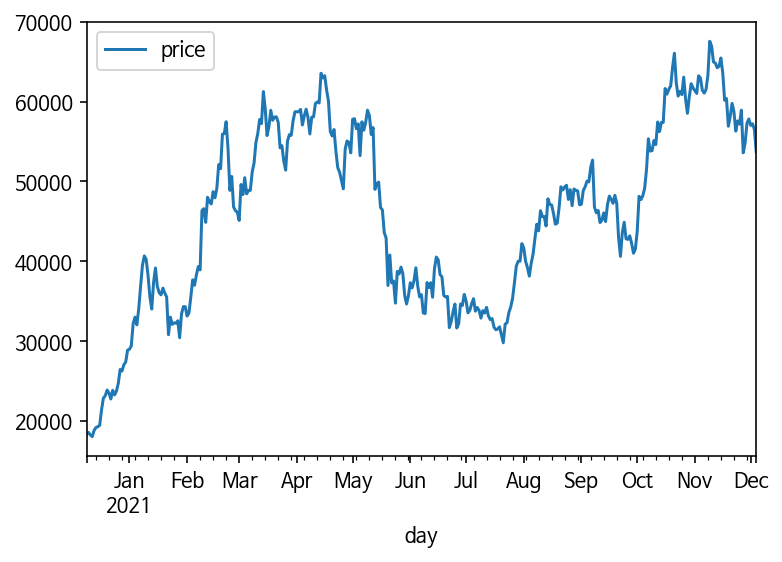

In [10]:
bitcoin_train_df.plot()

In [11]:
# ARIMA (아리마 모델) : 시계열의 유명한 모델
# AR + I + MA
# AR : 값들의 흐름의 특징을 가지고 예측하는 모델
# MA : 값들의 차이의 특징을 가지고 예측하는 모델
# I : AR+MA
# 월별, 계절별 trend도 예측할 수 있도록 해줌

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [13]:
# 객체 생성
model = ARIMA(bitcoin_train_df.price.values, order=(2, 1, 2))

In [14]:
model_fit = model.fit(trend='c', full_output=True)

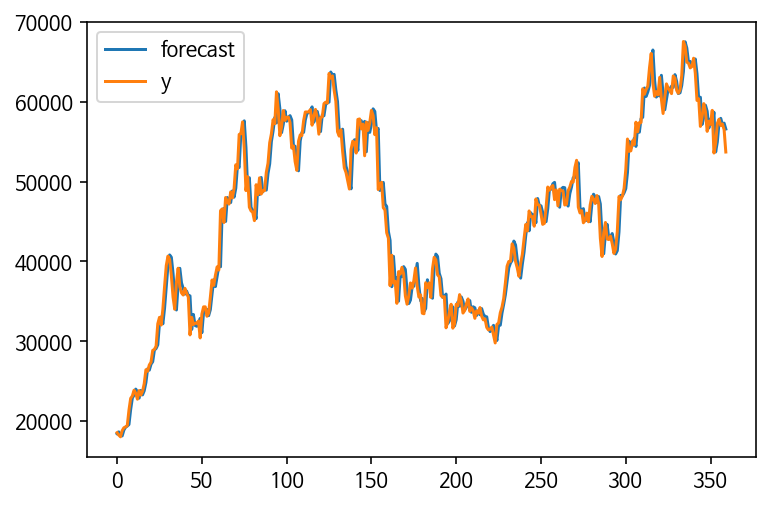

In [15]:
fig = model_fit.plot_predict()

In [16]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([53878.51041868, 53928.01418335, 53918.95039997, 53964.81109877,
        54116.40429724]),
 array([1882.64028629, 2611.29411865, 3183.32955089, 3707.1296496 ,
        4194.3311357 ]),
 array([[50188.60326172, 57568.41757564],
        [48809.97175776, 59046.05660894],
        [47679.73912929, 60158.16167064],
        [46698.97049954, 61230.651698  ],
        [45895.66633203, 62337.14226245]]))

In [17]:
pred_y = forecast_data[0].tolist()
pred_y

[53878.510418679354,
 53928.014183351304,
 53918.95039996678,
 53964.811098770224,
 54116.404297240966]

In [18]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [19]:
test_y = bitcoin_test_df.price.values.tolist()
test_y

[49253.86, 49380.43, 50564.63, 50645.41, 50511.12]

In [20]:
r2_score(test_y, pred_y)

-39.44916401714005

In [21]:
year_1_mse = mean_squared_error(test_y, pred_y)
year_1_mse

15467175.45274812

In [22]:
# 5년치 가지고 해보시고, 최근 5일을 맞추어보세요..

In [23]:
bitcoin_df2 = pd.read_csv('/content/market-price.csv', 
                         names=['day', 'price'],
                         encoding='utf-8')
bitcoin_df2 = bitcoin_df2.drop([0])

In [24]:
bitcoin_df2.head()

,day,price
1,2019-04-21 00:00:00,5309.28
2,2019-04-22 00:00:00,5281.83
3,2019-04-23 00:00:00,5377.19
4,2019-04-24 00:00:00,5518.16
5,2019-04-25 00:00:00,5434.19


In [25]:
bitcoin_df2.reset_index(drop=True)

,day,price
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83
2,2019-04-23 00:00:00,5377.19
3,2019-04-24 00:00:00,5518.16
4,2019-04-25 00:00:00,5434.19
...,...,...
1090,2022-04-15 00:00:00,39939.9
1091,2022-04-16 00:00:00,40566.2
1092,2022-04-17 00:00:00,40388.78
1093,2022-04-18 00:00:00,39711.45


In [26]:
bitcoin_train_df2 = bitcoin_df2.iloc[:1090]
bitcoin_train_df2[:5]

,day,price
1,2019-04-21 00:00:00,5309.28
2,2019-04-22 00:00:00,5281.83
3,2019-04-23 00:00:00,5377.19
4,2019-04-24 00:00:00,5518.16
5,2019-04-25 00:00:00,5434.19


In [27]:
bitcoin_train_df2['day'] = pd.to_datetime(bitcoin_train_df2['day'])
bitcoin_train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 1 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1090 non-null   datetime64[ns]
 1   price   1090 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.5+ KB


In [28]:
bitcoin_train_df2['price'] = pd.to_numeric(bitcoin_train_df2['price'])
bitcoin_train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 1 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1090 non-null   datetime64[ns]
 1   price   1090 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.5 KB


In [29]:
bitcoin_train_df2.set_index('day', inplace=True)
bitcoin_train_df2.head(2)

,price
day,
2019-04-21,5309.28
2019-04-22,5281.83


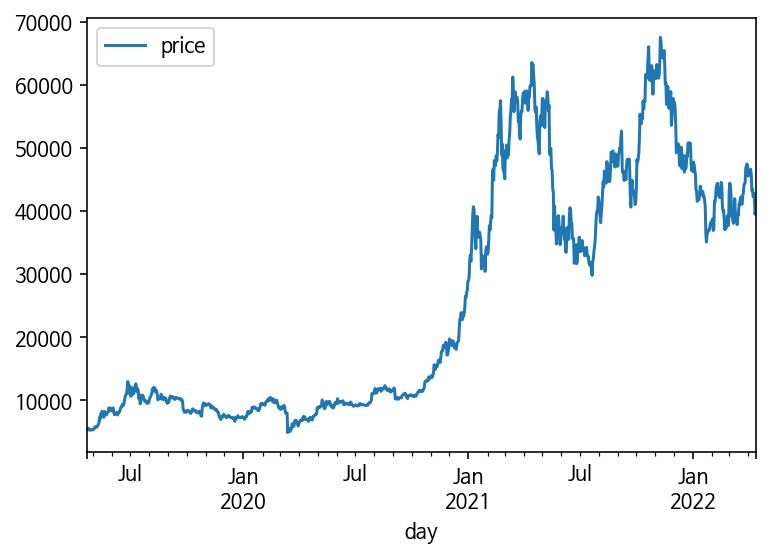

In [30]:
bitcoin_train_df2.plot()

In [31]:
# 객체 생성
model2 = ARIMA(bitcoin_train_df2.price.values, order=(2, 1, 2))

In [32]:
model2_fit = model2.fit(trend='c', full_output=True)

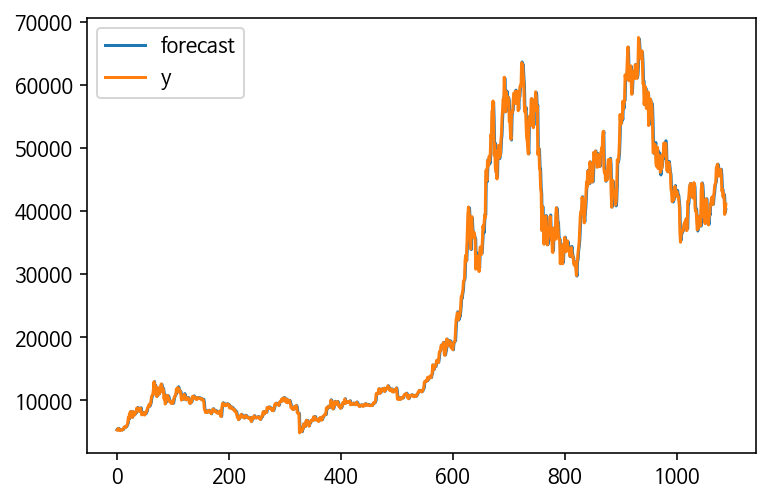

In [33]:
fig = model2_fit.plot_predict()

In [34]:
forecast2_data = model2_fit.forecast(steps=5)
forecast2_data

(array([40984.14345285, 40754.48254665, 40758.41212892, 41018.39279628,
        41266.80927788]),
 array([1230.66936271, 1712.68033542, 2076.4544897 , 2397.14834542,
        2695.98442384]),
 array([[38572.07582507, 43396.21108063],
        [37397.69077219, 44111.2743211 ],
        [36688.63611357, 44828.18814428],
        [36320.06837366, 45716.7172189 ],
        [35982.77690427, 46550.84165149]]))

In [35]:
pred_y2 = forecast2_data[0].tolist()
pred_y2

[40984.143452851255,
 40754.48254664857,
 40758.41212892331,
 41018.39279628061,
 41266.80927788353]

In [36]:
bitcoin_test_df2 = bitcoin_df2[1090:]
bitcoin_test_df2

,day,price
1091,2022-04-15 00:00:00,39939.9
1092,2022-04-16 00:00:00,40566.2
1093,2022-04-17 00:00:00,40388.78
1094,2022-04-18 00:00:00,39711.45
1095,2022-04-19 00:00:00,40805.72


In [37]:
test_y2 = bitcoin_test_df2.price.values.tolist()
test_y2

['39939.9', '40566.2', '40388.78', '39711.45', '40805.72']

In [38]:
r2_score(test_y2, pred_y2)

-2.9347018458466247

In [39]:
year_5_mse = mean_squared_error(test_y2, pred_y2)
year_5_mse

636645.0823713003

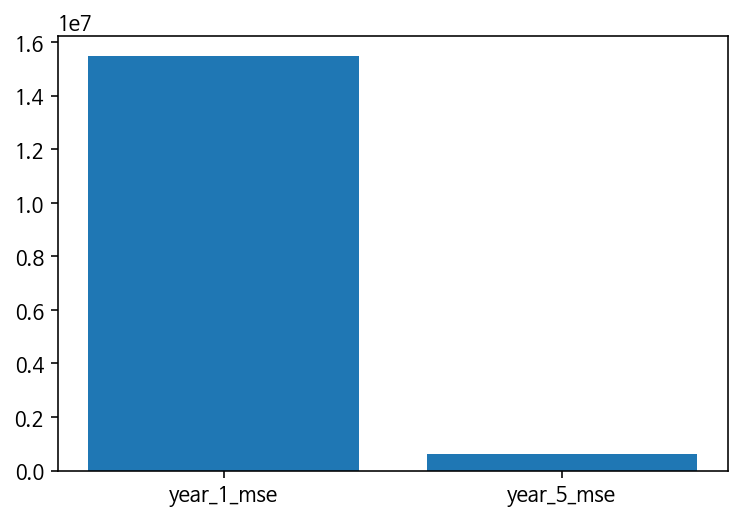

In [40]:
x = np.arange(2)
plt.bar(x, height= [
                    year_1_mse,
                    year_5_mse
            ])
plt.xticks(x, ['year_1_mse', 
               'year_5_mse']);

In [41]:
# fbprophet : 페이스북에서 제작한 시계열 예측 라이브러리
from fbprophet import Prophet

In [42]:
bitcoin_df_5_fb = pd.read_csv('/content/market-price.csv', names=['ds', 'y'], encoding='utf-8')

In [43]:
bitcoin_df_5_fb.drop([0], inplace=True)

In [44]:
bitcoin_df_5_fb['ds'] = pd.to_datetime(bitcoin_df_5_fb['ds'])

In [45]:
bitcoin_df_5_fb = bitcoin_df_5_fb.reset_index(drop=True)
bitcoin_df_5_fb

,ds,y
0,2019-04-21,5309.28
1,2019-04-22,5281.83
2,2019-04-23,5377.19
3,2019-04-24,5518.16
4,2019-04-25,5434.19
...,...,...
1090,2022-04-15,39939.9
1091,2022-04-16,40566.2
1092,2022-04-17,40388.78
1093,2022-04-18,39711.45


In [46]:
bitcoin_df_5_fb.head(2)

,ds,y
0,2019-04-21,5309.28
1,2019-04-22,5281.83


In [47]:
prophet = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet.fit(bitcoin_df_5_fb)

In [48]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data3 = prophet.predict(future_data)
future_data

,ds
0,2019-04-21
1,2019-04-22
2,2019-04-23
3,2019-04-24
4,2019-04-25
...,...
1095,2022-04-20
1096,2022-04-21
1097,2022-04-22
1098,2022-04-23


In [49]:
forecast_data3[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1095,2022-04-20,40676.209016,38471.733231,42931.803819
1096,2022-04-21,40711.450501,38392.553160,42999.695763
1097,2022-04-22,40416.957396,38138.833746,42869.068548
1098,2022-04-23,40417.901252,37996.149297,42532.047455
1099,2022-04-24,40376.438270,38067.474777,42609.196575


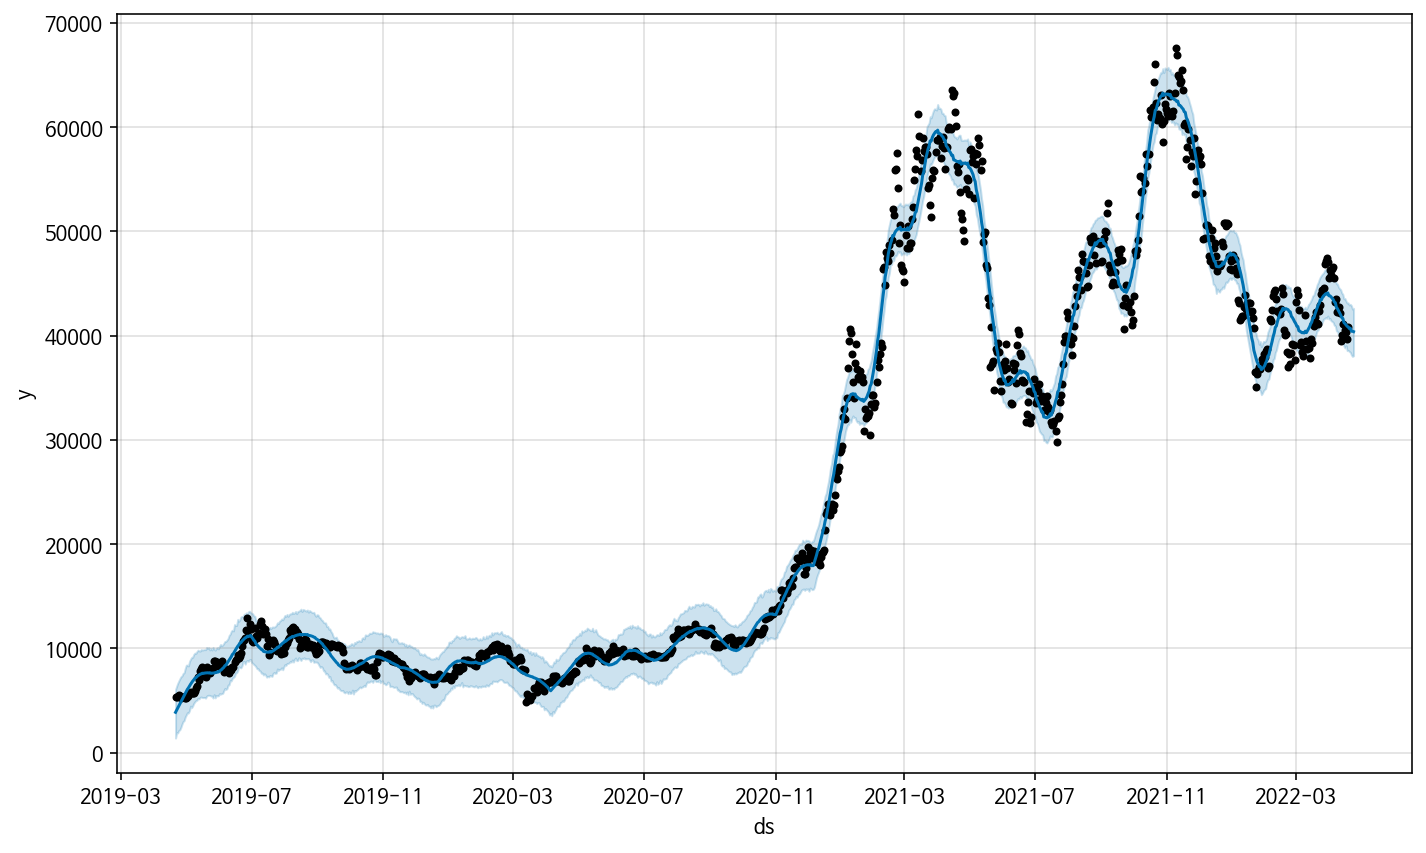

In [50]:
fig3 = prophet.plot(forecast_data3)

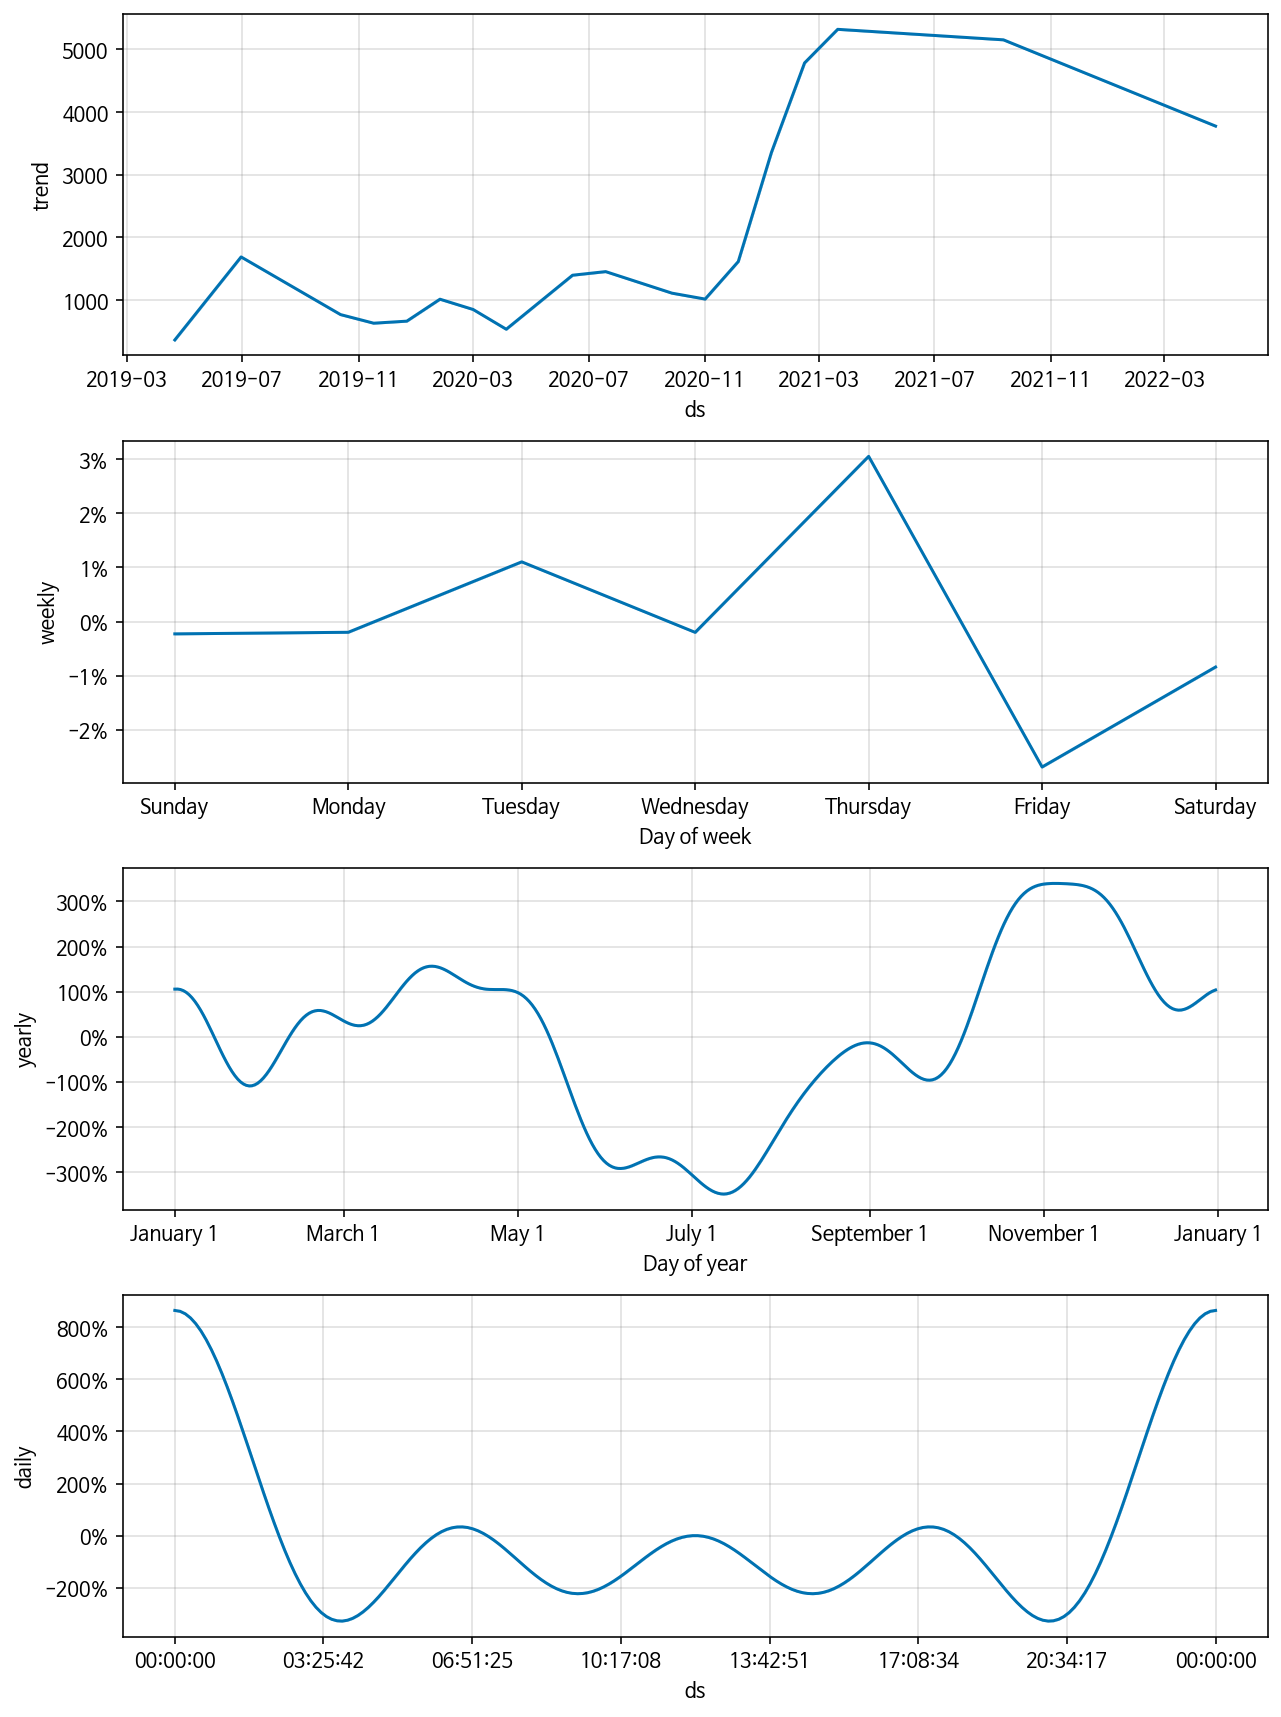

In [51]:
fig4 = prophet.plot_components(forecast_data3)

In [52]:
# mse를 구해보자
bitcoin_df_5_fb.tail(3)

,ds,y
1092,2022-04-17,40388.78
1093,2022-04-18,39711.45
1094,2022-04-19,40805.72


In [53]:
bitcoin_df_5_fb2_train = bitcoin_df_5_fb.iloc[:1090]
bitcoin_df_5_fb2_train.tail(3)

,ds,y
1087,2022-04-12,39488.62
1088,2022-04-13,40102.2
1089,2022-04-14,41148.06


In [54]:
bitcoin_df_5_fb2_test = bitcoin_df_5_fb.iloc[1090:]
bitcoin_df_5_fb2_test

,ds,y
1090,2022-04-15,39939.9
1091,2022-04-16,40566.2
1092,2022-04-17,40388.78
1093,2022-04-18,39711.45
1094,2022-04-19,40805.72


In [55]:
prophet2 = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet2.fit(bitcoin_df_5_fb2_train)

In [56]:
future_data2 = prophet2.make_future_dataframe(periods = 5, freq = 'd')
forecast_data4 = prophet2.predict(future_data2)
forecast_data4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-04-21,366.713779,1641.381849,6065.445465,366.713779,366.713779,9.00172,9.00172,9.00172,9.682027,...,0.000047,0.000047,0.000047,0.680259,0.680259,0.680259,0.0,0.0,0.0,3917.246469
1,2019-04-22,383.758333,1843.263271,6331.409921,383.758333,383.758333,9.00172,9.00172,9.00172,9.699285,...,-0.001562,-0.001562,-0.001562,0.699127,0.699127,0.699127,0.0,0.0,0.0,4105.939945
2,2019-04-23,400.802886,1932.733862,6594.335056,400.802886,400.802886,9.00172,9.00172,9.00172,9.730755,...,0.008892,0.008892,0.008892,0.720143,0.720143,0.720143,0.0,0.0,0.0,4300.917704
3,2019-04-24,417.847440,2202.611462,6727.007934,417.847440,417.847440,9.00172,9.00172,9.00172,9.741661,...,-0.002435,-0.002435,-0.002435,0.742375,0.742375,0.742375,0.0,0.0,0.0,4488.375646
4,2019-04-25,434.891994,2443.739505,7143.606791,434.891994,434.891994,9.00172,9.00172,9.00172,9.794832,...,0.028343,0.028343,0.028343,0.764768,0.764768,0.764768,0.0,0.0,0.0,4694.585920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2022-04-15,4029.406661,40558.657595,45097.237176,4029.406661,4029.406661,9.00172,9.00172,9.00172,9.619371,...,-0.025417,-0.025417,-0.025417,0.643067,0.643067,0.643067,0.0,0.0,0.0,42789.762804
1091,2022-04-16,4026.062998,40465.092196,45131.542010,4026.062998,4026.062998,9.00172,9.00172,9.00172,9.633315,...,-0.007869,-0.007869,-0.007869,0.639463,0.639463,0.639463,0.0,0.0,0.0,42810.395466
1092,2022-04-17,4022.719335,40420.201730,44890.202399,4022.719335,4022.719335,9.00172,9.00172,9.00172,9.641967,...,0.000047,0.000047,0.000047,0.640199,0.640199,0.640199,0.0,0.0,0.0,42809.645692
1093,2022-04-18,4019.375672,40383.701856,45222.676312,4019.375672,4019.375672,9.00172,9.00172,9.00172,9.645481,...,-0.001562,-0.001562,-0.001562,0.645323,0.645323,0.645323,0.0,0.0,0.0,42788.188089


In [57]:
result_df_3 = pd.DataFrame({
    'day' : bitcoin_df_5_fb2_test['ds'],
    'real_data' : bitcoin_df_5_fb2_test['y'],
    'pred_date' : forecast_data4['yhat'].tail(5)
})
result_df_3

,day,real_data,pred_date
1090,2022-04-15,39939.9,42789.762804
1091,2022-04-16,40566.2,42810.395466
1092,2022-04-17,40388.78,42809.645692
1093,2022-04-18,39711.45,42788.188089
1094,2022-04-19,40805.72,42832.221855


In [58]:
pb_mse = mean_squared_error(result_df_3['real_data'], result_df_3['pred_date'])
pb_mse

6518349.805453459

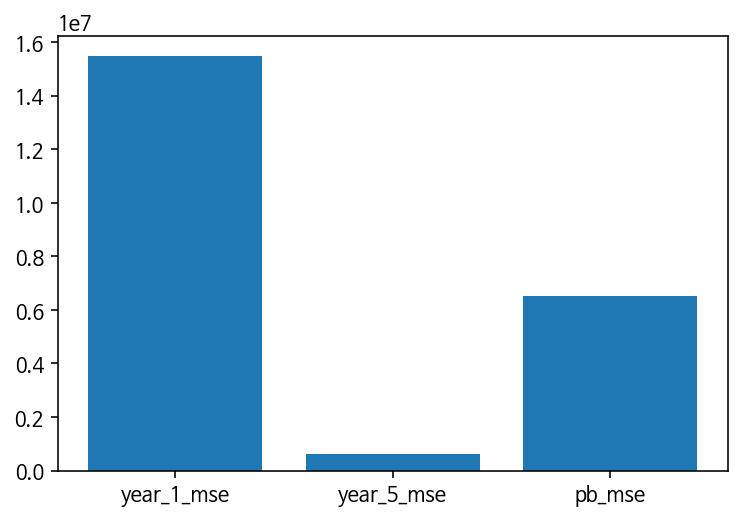

In [59]:
x = np.arange(3)
plt.bar(x, height= [
                    year_1_mse,
                    year_5_mse,
                    pb_mse
            ])
plt.xticks(x, ['year_1_mse', 
               'year_5_mse',
               'pb_mse'
               ]);

In [ ]:
%%shell
jupyter nbconvert --to html /content/시계열_비트코인_가격예측.ipynb # 파일 html로 저장